# ML Classification dataset: Congressional Voting Records

Use the voting records of congressmen and labels of their Party affiliation to build a model to predict what party they belong to

In [1]:
# Get dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
header_list = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration',
       'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports',
       'eaa_rsa']

In [3]:
# Get the data and put into a dataframe
df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv', names=header_list)

In [4]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
# "Replace n with 0 and y with 1
df.replace({'n':0,'y':1,'democrat':0,'republican':1}, inplace=True)

There appear to be quite a few '?' values which are for all intents and purposes missing values.
First let's try changing them to NaN values and dropping them to see the effect on the dataset

In [6]:
df[df == '?'] = np.nan

In [7]:
df.isnull().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [8]:
df.shape

(435, 17)

In [9]:
df_drop = df.dropna()

In [10]:
df_drop.shape

(232, 17)

We would lose half of our dataset if we dropped all the rows with NaN values. We will try using an impute method instead.

## Impute NaN values in the dataframe

In [11]:
# Import dependencies
from sklearn.impute import SimpleImputer

In [12]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [13]:
# make a list of all column names other than 'party'
col_names = df.drop('party', axis=1).columns
col_names

Index(['infants', 'water', 'budget', 'physician', 'salvador', 'religious',
       'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education',
       'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'],
      dtype='object')

In [14]:
for col in col_names:
    imp = imp.fit(df[[col]])
    df[col] = imp.transform(df[[col]]).ravel()

In [15]:
df.isnull().sum()

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64

In [16]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


# Simple EDA 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    int64 
 1   infants            435 non-null    object
 2   water              435 non-null    object
 3   budget             435 non-null    object
 4   physician          435 non-null    object
 5   salvador           435 non-null    object
 6   religious          435 non-null    object
 7   satellite          435 non-null    object
 8   aid                435 non-null    object
 9   missile            435 non-null    object
 10  immigration        435 non-null    object
 11  synfuels           435 non-null    object
 12  education          435 non-null    object
 13  superfund          435 non-null    object
 14  crime              435 non-null    object
 15  duty_free_exports  435 non-null    object
 16  eaa_rsa            435 non-null    object
dt

In [18]:
df_desc = df.describe()

In [19]:
df_desc

,party
count,435.000000
mean,0.386207
std,0.487440
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [20]:
col_list = header_list[1:]

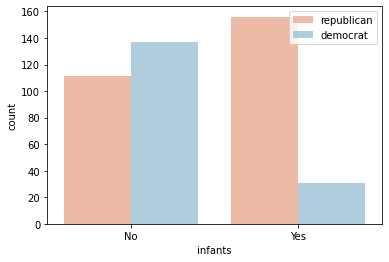

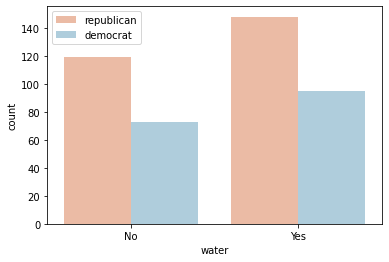

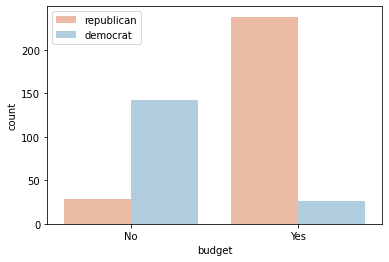

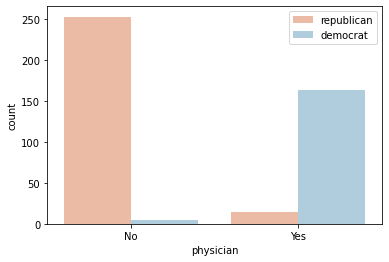

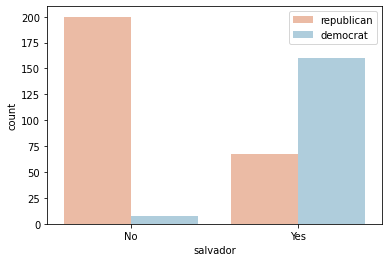

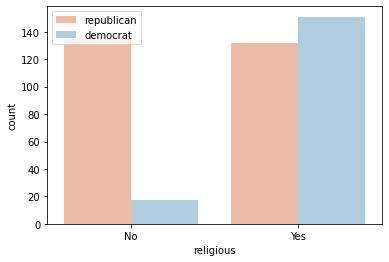

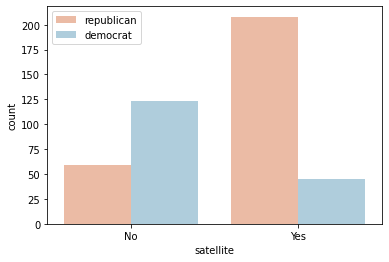

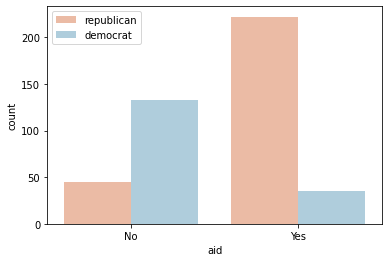

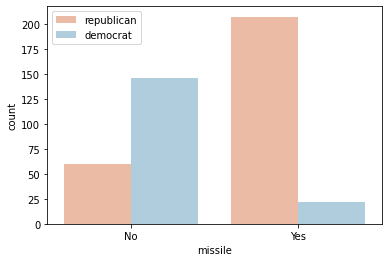

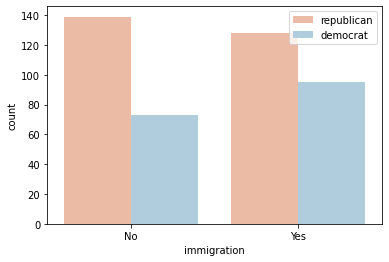

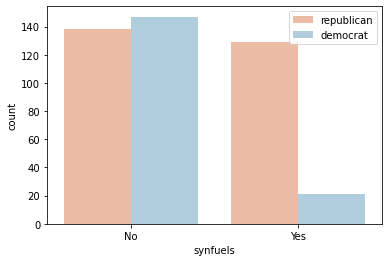

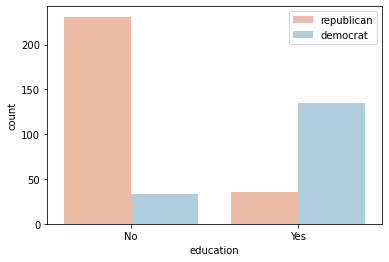

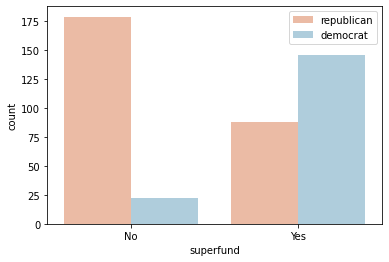

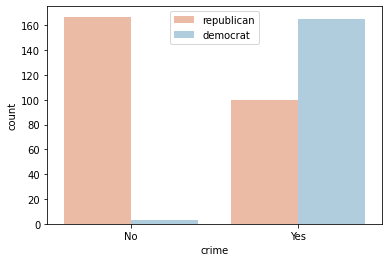

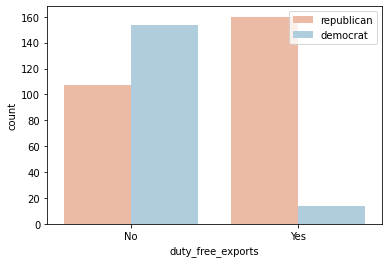

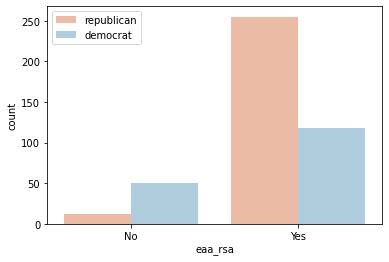

In [21]:
for col in col_list:
    plt.figure()
    sns.countplot(x=col , hue='party', data=df, palette='RdBu')
    plt.xticks([0,1],['No','Yes'])
    plt.legend(['republican','democrat'])

# k-Nearest Neighbors: Fit
We will fit a k-Nearest Neighbors classifier to the voting dataset with a k-NN classifier with 6 neighbors and fit it to the data

In [22]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [23]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

# Create a bogus record to get a prediction
X_new = X[1].reshape(1,-1)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print(f"Prediction: {new_prediction}")

Prediction: [1]


# Logistic regression fit

In [24]:
# Import dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
# Instantiate the model
logreg = LogisticRegression()

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.4, random_state=42)

In [27]:
# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Predict
y_pred = logreg.predict(X_test)

# Plot the ROC curve of the predictions

In [29]:
# Import dependencies
from sklearn.metrics import roc_curve

In [30]:
# Determine the prediction probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

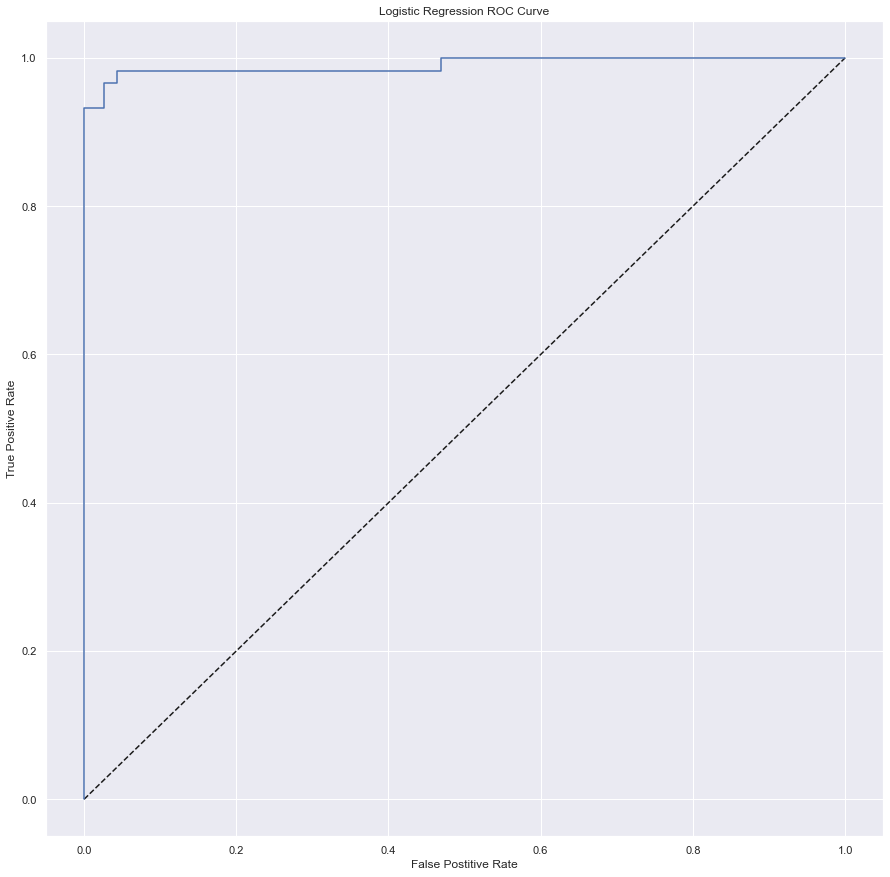

In [31]:
# Plot the ROC curve
sns.set_theme()
fig, ax = plt.subplots(figsize=(15,15))
plt.plot([0,1],[0,1], 'k--')     # diagonal dashed line
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Postitive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

# GridSearchCV

In [32]:
# Import dependencies 
from sklearn.model_selection import GridSearchCV

In [33]:
# Set up a dictionary with a range of hyperparameter values
param_grid = {'n_neighbors': np.arange(1,50)}

In [34]:
# Instantiate the model
knn = KNeighborsClassifier()

In [35]:
# Set up gridsearch and then fit
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [36]:
# Print out the optimum hyperparameter
print(knn_cv.best_params_)

{'n_neighbors': 2}


In [37]:
# Print out the best score
knn_cv.best_score_

0.9333333333333333

# Use a pipeline starting with the initial data to combine imputing with modeling in one step

In [38]:
# Get the data and put into a dataframe
df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv', names=header_list)

In [39]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [40]:
# "Replace n with 0 and y with 1
df.replace({'n':0,'y':1,'democrat':0,'republican':1}, inplace=True)

There appear to be quite a few '?' values which are for all intents and purposes missing values.
First let's try changing them to NaN values and dropping them to see the effect on the dataset

In [41]:
df[df == '?'] = np.nan

In [42]:
df.isnull().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [43]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [44]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('SVM', SVC())]

In [45]:
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

In [46]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

In [47]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputation', SimpleImputer(strategy='most_frequent')),
                ('SVM', SVC())])

In [49]:
# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        85
           1       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131

